In [1]:
from histimator.models import HistiModel, HistiChannel, HistiSample
from histimator.estimator import BinnedLH

In [2]:
from iminuit import Minuit, describe
import numpy as np
%matplotlib inline

## Testing multiple Regions

In [3]:
hist_1 = np.asarray([1,2,3,4])
hist_2 = np.asarray([5,5,5,5])
hist_3 = np.asarray([3,4,5,4])
bins_1 = np.asarray([0,1,2,3,4])
bins_2 = np.asarray([0,1,2])
bins_3 = np.asarray([0,1,2,3,4,5,6,7,8])

In [4]:
m = HistiModel('model')
signal_1 = HistiSample('signal')
signal_1.SetHisto((hist_1,bins_1))
signal_1.AddNorm("SigXSecOverSM",1.0,0,3)
background_1 = HistiSample('background1')
background_1.SetHisto((hist_2,bins_1))
background_1.AddOverallSys("BackgroundNormSyst1",0.9,1.1)
background_2 = HistiSample('background1')
background_2.SetHisto((hist_3,bins_1))
background_2.AddOverallSys("BackgroundNormSyst2",0.7,1.3)

In [5]:
chan1 = HistiChannel("SR")
chan1.AddSample(signal_1)
chan1.AddSample(background_1)
chan1.AddSample(background_2)

In [6]:
data1 = hist_1*2 +hist_2 +hist_3

chan1.SetData(data1)
m.AddChannel(chan1)

In [7]:
blh = BinnedLH(m)
params = m.Parameters()
minimiser = Minuit(blh, **params)
minimiser.migrad()

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst1 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst2 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until


FCN = 7.93730960596 
 TOTAL NCALL = 93 
 NCALLS = 93 
 
 
 EDM = 3.80092399562e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2.00357,2.46754,0,0,0.0,3.0,
2,BackgroundNormSyst1,-0.0531703,3.82936,0,0,-3.0,3.0,
3,BackgroundNormSyst2,0.0321934,3.87475,0,0,-3.0,3.0,


({'hesse_failed': False, 'has_reached_call_limit': False, 'has_accurate_covar': True, 'has_posdef_covar': True, 'up': 1.0, 'edm': 3.80092399562466e-05, 'is_valid': True, 'is_above_max_edm': False, 'has_covariance': True, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'fval': 7.937309605956761, 'nfcn': 93},
 [{'is_const': False, 'name': 'SigXSecOverSM', 'has_limits': True, 'value': 2.003572034798038, 'number': 0, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit': 0.0, 'has_upper_limit': True, 'error': 2.467540843271004, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst1', 'has_limits': True, 'value': -0.05317028751493247, 'number': 1, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit': -3.0, 'has_upper_limit': True, 'error': 3.829364960299342, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst2', 'has_limits': True, 'value': 0.03219343471620917, 'number': 2, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit':

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/iminuit/_plotting.py:51: RuntimeWarning: band and text is requested but the bound is too narrow.
  warnings.warn(RuntimeWarning('band and text is requested but'


(array([-2.93150965, -2.83181103, -2.73211241, -2.63241379, -2.53271517,
        -2.43301655, -2.33331793, -2.23361931, -2.13392069, -2.03422207,
        -1.93452345, -1.83482483, -1.73512621, -1.63542759, -1.53572897,
        -1.43603035, -1.33633173, -1.23663311, -1.13693449, -1.03723587,
        -0.93753725, -0.83783863, -0.73814001, -0.63844139, -0.53874277,
        -0.43904415, -0.33934553, -0.23964691, -0.13994829, -0.04024967,
         0.05944895,  0.15914757,  0.25884619,  0.35854481,  0.45824343,
         0.55794205,  0.65764067,  0.75733929,  0.85703791,  0.95673653,
         1.05643515,  1.15613377,  1.25583239,  1.35553101,  1.45522963,
         1.55492825,  1.65462687,  1.75432548,  1.8540241 ,  1.95372272,
         2.05342134,  2.15311996,  2.25281858,  2.3525172 ,  2.45221582,
         2.55191444,  2.65161306,  2.75131168,  2.8510103 ,  2.95070892,
         3.05040754,  3.15010616,  3.24980478,  3.3495034 ,  3.44920202,
         3.54890064,  3.64859926,  3.74829788,  3.8

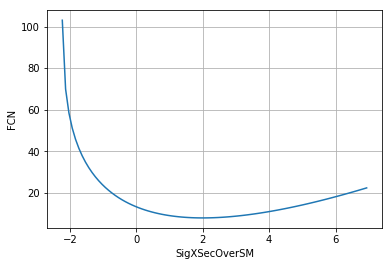

In [8]:
minimiser.draw_profile('SigXSecOverSM')

In [9]:
signal_1 = HistiSample('signal')
signal_1.SetHisto((hist_1[:2],bins_2))
signal_1.AddNorm("SigXSecOverSM",1.0,0,3)
background_1 = HistiSample('background1')
background_1.SetHisto((hist_2[:2],bins_2))
background_1.AddOverallSys("BackgroundNormSyst1",0.9,1.1)
background_2 = HistiSample('background1')
background_2.SetHisto((hist_3[:2],bins_2))
background_2.AddOverallSys("BackgroundNormSyst3",0.7,1.3)

In [10]:
chan2 = HistiChannel("CR1")
chan2.AddSample(signal_1)
chan2.AddSample(background_1)
chan2.AddSample(background_2)

In [11]:
data2 = hist_1[:2]*2 +hist_2[:2] +hist_3[:2]

chan2.SetData(data2)
m.AddChannel(chan2)

In [12]:
blh = BinnedLH(m)
params = m.Parameters()
minimiser = Minuit(blh, **params)

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst1 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst2 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst3 is floating but does not have initial step size. Assume 1.
  This is se

In [13]:
minimiser.migrad()

FCN = 12.2250747675 
 TOTAL NCALL = 58 
 NCALLS = 58 
 
 
 EDM = 2.64917386445e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.90108,0.864303,0,0,0.0,3.0,
2,BackgroundNormSyst1,-0.925563,3.99084,0,0,-3.0,3.0,
3,BackgroundNormSyst2,0.613885,1.66054,0,0,-3.0,3.0,
4,BackgroundNormSyst3,0.6,4.70493,0,0,-3.0,3.0,


({'hesse_failed': True, 'has_reached_call_limit': False, 'has_accurate_covar': False, 'has_posdef_covar': False, 'up': 1.0, 'edm': 2.6491738644509575e-05, 'is_valid': False, 'is_above_max_edm': False, 'has_covariance': True, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'fval': 12.22507476751256, 'nfcn': 58},
 [{'is_const': False, 'name': 'SigXSecOverSM', 'has_limits': True, 'value': 1.9010762750328438, 'number': 0, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit': 0.0, 'has_upper_limit': True, 'error': 0.8643025927438515, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst1', 'has_limits': True, 'value': -0.9255627837233646, 'number': 1, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit': -3.0, 'has_upper_limit': True, 'error': 3.9908378597610876, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst2', 'has_limits': True, 'value': 0.6138847392136957, 'number': 2, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_li

(array([ 0.17247109,  0.20739241,  0.24231372,  0.27723504,  0.31215636,
         0.34707767,  0.38199899,  0.41692031,  0.45184162,  0.48676294,
         0.52168426,  0.55660558,  0.59152689,  0.62644821,  0.66136953,
         0.69629084,  0.73121216,  0.76613348,  0.80105479,  0.83597611,
         0.87089743,  0.90581874,  0.94074006,  0.97566138,  1.01058269,
         1.04550401,  1.08042533,  1.11534665,  1.15026796,  1.18518928,
         1.2201106 ,  1.25503191,  1.28995323,  1.32487455,  1.35979586,
         1.39471718,  1.4296385 ,  1.46455981,  1.49948113,  1.53440245,
         1.56932376,  1.60424508,  1.6391664 ,  1.67408772,  1.70900903,
         1.74393035,  1.77885167,  1.81377298,  1.8486943 ,  1.88361562,
         1.91853693,  1.95345825,  1.98837957,  2.02330088,  2.0582222 ,
         2.09314352,  2.12806483,  2.16298615,  2.19790747,  2.23282879,
         2.2677501 ,  2.30267142,  2.33759274,  2.37251405,  2.40743537,
         2.44235669,  2.477278  ,  2.51219932,  2.5

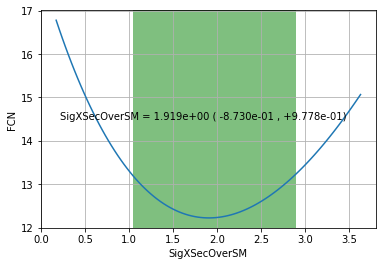

In [14]:
minimiser.draw_profile('SigXSecOverSM')

In [15]:
signal_1 = HistiSample('signal')
signal_1.SetHisto((np.hstack([hist_1,np.flip(hist_1,0)]),bins_3))
signal_1.AddNorm("SigXSecOverSM",1.0,0,3)
background_1 = HistiSample('background1')
background_1.SetHisto((np.hstack([hist_2,hist_2]),bins_3))
background_1.AddOverallSys("BackgroundNormSyst1",0.9,1.1)
background_2 = HistiSample('background1')
background_2.SetHisto((np.hstack([hist_3,hist_3]),bins_3))
background_2.AddOverallSys("BackgroundNormSyst2",0.7,1.3)

In [16]:
chan3 = HistiChannel("CR2")
chan3.AddSample(signal_1)
chan3.AddSample(background_1)
chan3.AddSample(background_2)

In [17]:
data3 = np.hstack([hist_1,np.flip(hist_1,0)])*2 + np.hstack([hist_2,hist_2]) + np.hstack([hist_3,hist_3])

chan3.SetData(data3)
m.AddChannel(chan3)

In [18]:
blh = BinnedLH(m)
params = m.Parameters()
minimiser = Minuit(blh, **params)
minimiser.migrad()

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst1 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst2 is floating but does not have initial step size. Assume 1.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:3: InitialParamWarning: Parameter BackgroundNormSyst3 is floating but does not have initial step size. Assume 1.
  This is se

FCN = 30.1211933907 
 TOTAL NCALL = 66 
 NCALLS = 66 
 
 
 EDM = 2.42569783039e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 False 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 True 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.98943,0.552463,0,0,0.0,3.0,
2,BackgroundNormSyst1,-0.550002,2.37258,0,0,-3.0,3.0,
3,BackgroundNormSyst2,0.28507,1.20499,0,0,-3.0,3.0,
4,BackgroundNormSyst3,0.6,4.70493,0,0,-3.0,3.0,


({'hesse_failed': True, 'has_reached_call_limit': False, 'has_accurate_covar': False, 'has_posdef_covar': False, 'up': 1.0, 'edm': 2.4256978303884984e-05, 'is_valid': False, 'is_above_max_edm': False, 'has_covariance': True, 'has_made_posdef_covar': False, 'has_valid_parameters': True, 'fval': 30.121193390741787, 'nfcn': 66},
 [{'is_const': False, 'name': 'SigXSecOverSM', 'has_limits': True, 'value': 1.9894317007603035, 'number': 0, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit': 0.0, 'has_upper_limit': True, 'error': 0.5524632838030152, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst1', 'has_limits': True, 'value': -0.5500019383856918, 'number': 1, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_limit': -3.0, 'has_upper_limit': True, 'error': 2.372584061988221, 'is_fixed': False},
  {'is_const': False, 'name': 'BackgroundNormSyst2', 'has_limits': True, 'value': 0.28507028584837935, 'number': 2, 'has_lower_limit': True, 'upper_limit': 3.0, 'lower_l

(array([ 0.88450513,  0.90682688,  0.92914863,  0.95147038,  0.97379213,
         0.99611388,  1.01843563,  1.04075738,  1.06307912,  1.08540087,
         1.10772262,  1.13004437,  1.15236612,  1.17468787,  1.19700962,
         1.21933137,  1.24165311,  1.26397486,  1.28629661,  1.30861836,
         1.33094011,  1.35326186,  1.37558361,  1.39790536,  1.42022711,
         1.44254885,  1.4648706 ,  1.48719235,  1.5095141 ,  1.53183585,
         1.5541576 ,  1.57647935,  1.5988011 ,  1.62112284,  1.64344459,
         1.66576634,  1.68808809,  1.71040984,  1.73273159,  1.75505334,
         1.77737509,  1.79969684,  1.82201858,  1.84434033,  1.86666208,
         1.88898383,  1.91130558,  1.93362733,  1.95594908,  1.97827083,
         2.00059258,  2.02291432,  2.04523607,  2.06755782,  2.08987957,
         2.11220132,  2.13452307,  2.15684482,  2.17916657,  2.20148831,
         2.22381006,  2.24613181,  2.26845356,  2.29077531,  2.31309706,
         2.33541881,  2.35774056,  2.38006231,  2.4

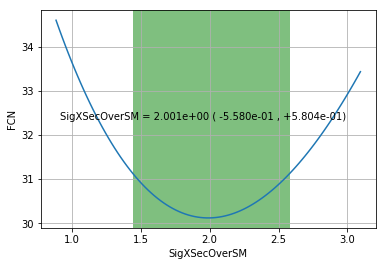

In [19]:
minimiser.draw_profile('SigXSecOverSM')